In [1]:
import pandas as pd

In [3]:
MCI_flights_df = pd.read_csv('../Resources/MCI_21-23.csv').drop(['Unnamed: 0'],axis=1)
MCI_05_20 = pd.read_csv('../Resources/MCI_05-20.csv')
MCI_05_19 = pd.read_csv('../Resources/MCI_05-19.csv')
MCI_05_18 = pd.read_csv('../Resources/MCI_05-18.csv')

In [5]:
MCI_05_21_23 = MCI_flights_df.loc[MCI_flights_df['MONTH']==5]
MCI_05_21_23

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,ARR_DELAY_NEW,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,Status,DATE,DEST_LAT,DEST_LON,ORIGIN_LAT,ORIGIN_LON
9143,2021,5,1,6,AA,1098,N5007E,MCI,Kansas City,Missouri,...,6.0,0.0,0700-0759,0.0,Delayed,2021-05-01,32.753177,-97.332746,39.100105,-94.578142
9144,2021,5,1,6,AA,1255,N921NN,MCI,Kansas City,Missouri,...,0.0,-2.0,0900-0959,0.0,On Time,2021-05-01,25.774173,-80.193620,39.100105,-94.578142
9145,2021,5,1,6,AA,1261,N958NN,MCI,Kansas City,Missouri,...,0.0,-2.0,0900-0959,0.0,On Time,2021-05-01,32.753177,-97.332746,39.100105,-94.578142
9146,2021,5,1,6,AA,1614,N308RD,MCI,Kansas City,Missouri,...,2.0,0.0,1700-1759,0.0,On Time,2021-05-01,32.753177,-97.332746,39.100105,-94.578142
9147,2021,5,1,6,AA,1616,N910NN,MCI,Kansas City,Missouri,...,28.0,1.0,1300-1359,0.0,Delayed,2021-05-01,35.227209,-80.843083,39.100105,-94.578142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229689,2023,5,31,3,WN,786,N8854Q,MDW,Chicago,Illinois,...,7.0,0.0,2100-2159,0.0,On Time,2023-05-31,39.100105,-94.578142,41.875562,-87.624421
229690,2023,5,31,3,WN,800,N467WN,DEN,Denver,Colorado,...,0.0,-1.0,0001-0559,0.0,Delayed,2023-05-31,39.100105,-94.578142,39.739236,-104.984862
229691,2023,5,31,3,WN,857,N8603F,DAL,Dallas,Texas,...,6.0,0.0,0700-0759,0.0,Delayed,2023-05-31,39.100105,-94.578142,32.776272,-96.796856
229692,2023,5,31,3,WN,883,N928WN,STL,St. Louis,Missouri,...,35.0,2.0,2200-2259,0.0,Delayed,2023-05-31,39.100105,-94.578142,38.631966,-90.242876


In [10]:
pd.concat([MCI_05_18,MCI_05_19,MCI_05_20]).columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_UNIQUE_CARRIER',
       'MKT_CARRIER_FL_NUM', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_NM',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED'],
      dtype='object')

In [9]:
MCI_flights_df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_UNIQUE_CARRIER',
       'MKT_CARRIER_FL_NUM', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_NM',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'Status', 'DATE', 'DEST_LAT', 'DEST_LON',
       'ORIGIN_LAT', 'ORIGIN_LON'],
      dtype='object')

In [11]:
X = MCI_flights_df[['MONTH','DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK']]

In [12]:
y = MCI_flights_df[['Status']]

In [13]:
months = []
days = []
month_dict = {1:'January', 2: 'February',3:'March', 4: 'April',5:'May', 6: 'Jun',7:'July', 8: 'August',9:'September', 10: 'October',11:'November', 12: 'December'}
for row in X.iterrows():
    month = month_dict[row[1]['MONTH']]
    day = f"{row[1]['DAY_OF_MONTH']}"
    days.append(day)
    months.append(month)

In [14]:
X['MONTH'] = months
X['DAY_OF_MONTH'] = days

C:\Users\Matt\AppData\Local\Temp\ipykernel_7176\3325974230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MONTH'] = months
C:\Users\Matt\AppData\Local\Temp\ipykernel_7176\3325974230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DAY_OF_MONTH'] = days


In [15]:
dows = []
for row in X.iterrows():
    if row[1]['DAY_OF_WEEK'] == 1:
        dow = 'Monday'
    if row[1]['DAY_OF_WEEK'] == 2:
        dow = 'Tuesday'
    if row[1]['DAY_OF_WEEK'] == 3:
        dow = 'Wednesday'
    if row[1]['DAY_OF_WEEK'] == 4:
        dow = 'Thursday'
    if row[1]['DAY_OF_WEEK'] == 5:
        dow = 'Friday'
    if row[1]['DAY_OF_WEEK'] == 6:
        dow = 'Saturday'
    if row[1]['DAY_OF_WEEK'] == 7:
        dow = 'Sunday'
    dows.append(dow)

In [16]:
X['DAY_OF_WEEK'] = dows
X

C:\Users\Matt\AppData\Local\Temp\ipykernel_7176\3465271286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DAY_OF_WEEK'] = dows


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME
0,January,1,Friday,AA,MCI,ORD,1050
1,January,1,Friday,AA,MCI,DFW,928
2,January,1,Friday,AA,MCI,DFW,1728
3,January,1,Friday,AA,MCI,DFW,1530
4,January,1,Friday,AA,MCI,DFW,718
...,...,...,...,...,...,...,...
259853,December,31,Sunday,WN,DAL,MCI,2105
259854,December,31,Sunday,WN,DAL,MCI,640
259855,December,31,Sunday,WN,MKE,MCI,1020
259856,December,31,Sunday,WN,DCA,MCI,1240


In [17]:
X.dtypes

MONTH                 object
DAY_OF_MONTH          object
DAY_OF_WEEK           object
MKT_UNIQUE_CARRIER    object
ORIGIN                object
DEST                  object
CRS_DEP_TIME           int64
dtype: object

In [18]:
time_blks = []
for row in X.iterrows():
    time_blk = str(row[1]['CRS_DEP_TIME'])
    if len(time_blk) == 3:
        time_blks.append(time_blk[0])
    else:
        time_blks.append(time_blk[0:2])    

In [20]:
X['CRS_DEP_TIME_BLK'] = time_blks
X = X.drop(['CRS_DEP_TIME'],axis=1)
X

C:\Users\Matt\AppData\Local\Temp\ipykernel_7176\915415235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CRS_DEP_TIME_BLK'] = time_blks


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME_BLK
0,January,1,Friday,AA,MCI,ORD,10
1,January,1,Friday,AA,MCI,DFW,9
2,January,1,Friday,AA,MCI,DFW,17
3,January,1,Friday,AA,MCI,DFW,15
4,January,1,Friday,AA,MCI,DFW,7
...,...,...,...,...,...,...,...
259853,December,31,Sunday,WN,DAL,MCI,21
259854,December,31,Sunday,WN,DAL,MCI,6
259855,December,31,Sunday,WN,MKE,MCI,10
259856,December,31,Sunday,WN,DCA,MCI,12


In [21]:
y = pd.get_dummies(y)
y

,Status_Delayed,Status_On Time
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
259853,1,0
259854,0,1
259855,0,1
259856,1,0


In [22]:
y.describe()

,Status_Delayed,Status_On Time
count,259858.000000,259858.000000
mean,0.445786,0.554214
std,0.497053,0.497053
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [23]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Dense, Dropout

In [30]:
X_dummies = pd.get_dummies(X,drop_first=True)
X_dummies

,MONTH_August,MONTH_December,MONTH_February,MONTH_January,MONTH_July,MONTH_Jun,MONTH_March,MONTH_May,MONTH_November,MONTH_October,...,CRS_DEP_TIME_BLK_21,CRS_DEP_TIME_BLK_22,CRS_DEP_TIME_BLK_23,CRS_DEP_TIME_BLK_45,CRS_DEP_TIME_BLK_5,CRS_DEP_TIME_BLK_56,CRS_DEP_TIME_BLK_6,CRS_DEP_TIME_BLK_7,CRS_DEP_TIME_BLK_8,CRS_DEP_TIME_BLK_9
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259853,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
259854,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
259855,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259856,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_dummies.to_csv('../Resources/X_dummies.csv')

In [31]:
scaler = StandardScaler()
scaler.fit(X_dummies)
transformed_data = scaler.transform(X_dummies)
# Creating a DataFrame with with the scaled data
transformed_data_df = pd.DataFrame(transformed_data)

# Display sample data
transformed_data_df

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,-0.319702,-0.304985,-0.260808,3.666028,-0.319848,-0.310977,-0.290657,-0.302499,-0.311192,-0.319724,...,-0.213031,-0.127364,-0.020858,-0.001962,-0.202458,-0.012094,-0.281979,-0.250497,-0.272718,-0.246569
1,-0.319702,-0.304985,-0.260808,3.666028,-0.319848,-0.310977,-0.290657,-0.302499,-0.311192,-0.319724,...,-0.213031,-0.127364,-0.020858,-0.001962,-0.202458,-0.012094,-0.281979,-0.250497,-0.272718,4.055654
2,-0.319702,-0.304985,-0.260808,3.666028,-0.319848,-0.310977,-0.290657,-0.302499,-0.311192,-0.319724,...,-0.213031,-0.127364,-0.020858,-0.001962,-0.202458,-0.012094,-0.281979,-0.250497,-0.272718,-0.246569
3,-0.319702,-0.304985,-0.260808,3.666028,-0.319848,-0.310977,-0.290657,-0.302499,-0.311192,-0.319724,...,-0.213031,-0.127364,-0.020858,-0.001962,-0.202458,-0.012094,-0.281979,-0.250497,-0.272718,-0.246569
4,-0.319702,-0.304985,-0.260808,3.666028,-0.319848,-0.310977,-0.290657,-0.302499,-0.311192,-0.319724,...,-0.213031,-0.127364,-0.020858,-0.001962,-0.202458,-0.012094,-0.281979,3.992065,-0.272718,-0.246569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259853,-0.319702,3.278847,-0.260808,-0.272775,-0.319848,-0.310977,-0.290657,-0.302499,-0.311192,-0.319724,...,4.694147,-0.127364,-0.020858,-0.001962,-0.202458,-0.012094,-0.281979,-0.250497,-0.272718,-0.246569
259854,-0.319702,3.278847,-0.260808,-0.272775,-0.319848,-0.310977,-0.290657,-0.302499,-0.311192,-0.319724,...,-0.213031,-0.127364,-0.020858,-0.001962,-0.202458,-0.012094,3.546364,-0.250497,-0.272718,-0.246569
259855,-0.319702,3.278847,-0.260808,-0.272775,-0.319848,-0.310977,-0.290657,-0.302499,-0.311192,-0.319724,...,-0.213031,-0.127364,-0.020858,-0.001962,-0.202458,-0.012094,-0.281979,-0.250497,-0.272718,-0.246569
259856,-0.319702,3.278847,-0.260808,-0.272775,-0.319848,-0.310977,-0.290657,-0.302499,-0.311192,-0.319724,...,-0.213031,-0.127364,-0.020858,-0.001962,-0.202458,-0.012094,-0.281979,-0.250497,-0.272718,-0.246569


Text(0, 0.5, 'cumulative explained variance')

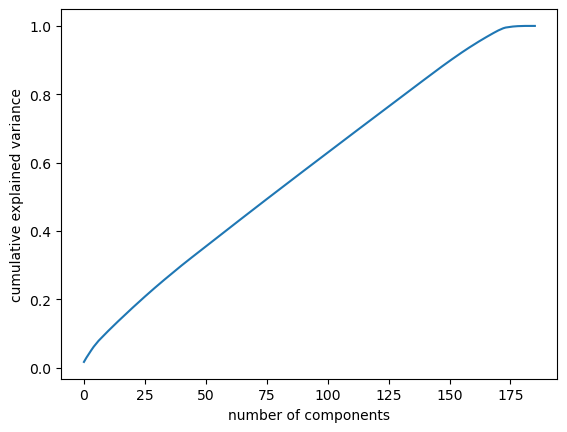

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(transformed_data_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
from sklearn.decomposition import PCA
# Create a PCA model
nc = 15
pca = PCA(n_components=nc)
pca_data = pca.fit_transform(transformed_data_df)
pca_dict = {}
for i in range(0,nc):
    pca_dict[f'pca{i+1}']=pca_data[:,i]
# Display sample data
pca_df = pd.DataFrame(pca_dict)
pca_df

In [33]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(transformed_data_df, y['Status_On Time'], random_state=78)

In [165]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=64, activation="relu", input_dim=len(transformed_data_df.columns)))
# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))
nn_model.add(Dropout(0.1))
# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=512, activation="relu"))
nn_model.add(Dropout(0.3))
# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=1024, activation="relu"))
nn_model.add(Dropout(0.5))
# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=512, activation="sigmoid"))
nn_model.add(Dropout(0.3))
nn_model.add(tf.keras.layers.Dense(units=64, activation="sigmoid"))
nn_model.add(Dropout(0.1))
# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 64)                10112     
                                                                 
 dense_57 (Dense)            (None, 128)               8320      
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 512)               66048     
                                                                 
 dropout_41 (Dropout)        (None, 512)               0         
                                                                 
 dense_59 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_42 (Dropout)        (None, 1024)             

In [166]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [167]:
# Train the model
fit_model = nn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
3043/3043 [==============================] - 26s 8ms/step - loss: 0.6124 - accuracy: 0.6776
Epoch 2/10
3043/3043 [==============================] - 24s 8ms/step - loss: 0.5988 - accuracy: 0.6907
Epoch 3/10
3043/3043 [==============================] - 24s 8ms/step - loss: 0.5911 - accuracy: 0.6970
Epoch 4/10
3043/3043 [==============================] - 24s 8ms/step - loss: 0.5844 - accuracy: 0.7036
Epoch 5/10
3043/3043 [==============================] - 25s 8ms/step - loss: 0.5784 - accuracy: 0.7088
Epoch 6/10
3043/3043 [==============================] - 24s 8ms/step - loss: 0.5738 - accuracy: 0.7119
Epoch 7/10
3043/3043 [==============================] - 24s 8ms/step - loss: 0.5688 - accuracy: 0.7159
Epoch 8/10
3043/3043 [==============================] - 24s 8ms/step - loss: 0.5652 - accuracy: 0.7193
Epoch 9/10
3043/3043 [==============================] - 24s 8ms/step - loss: 0.5606 - accuracy: 0.7219
Epoch 10/10
3043/3043 [==============================] - 24s 8ms/step - l

In [168]:
model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1015/1015 - 2s - loss: 0.6043 - accuracy: 0.6862 - 2s/epoch - 2ms/step
Loss: 0.6042983531951904, Accuracy: 0.6861905455589294


In [169]:
predictions = nn_model.predict(X_test)
predictions

1015/1015 [==============================] - 2s 2ms/step


array([[0.5924758 ],
       [0.75782555],
       [0.6854563 ],
       ...,
       [0.5504199 ],
       [0.4854427 ],
       [0.7549911 ]], dtype=float32)

In [170]:
y_test

85593     1
2157      1
22727     0
5561      1
25105     1
         ..
25833     0
118590    1
16902     1
60305     1
64131     0
Name: Status_On Time, Length: 32456, dtype: uint8

In [173]:
predictions_df

,0
0,0.592476
1,0.757826
2,0.685456
3,0.817422
4,0.806804
...,...
32451,0.594500
32452,0.618263
32453,0.550420
32454,0.485443


In [172]:
predictions_df = pd.DataFrame(predictions.tolist())
predictions_df.describe()

,0
count,32456.000000
mean,0.580430
std,0.235588
min,0.107098
25%,0.428993
50%,0.635055
75%,0.799233
max,0.826131


In [174]:
nn_model.save('../nn_model.keras')

In [34]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [36]:
model.score(X_train, y_train)

0.6661090957602377

In [37]:
# Make a prediction using the testing data
predictions = model.predict(X_test)
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test,predictions)

0.6559170714141423

In [38]:
# Generate a confusion matrix for the model
confusion_matrix(y_test,predictions)

array([[15840, 13024],
       [ 8554, 27547]], dtype=int64)

In [39]:
# Print the classification report for the model
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
accuracy

0.6678519202647579

In [40]:
tp

27547

In [41]:
tn

15840

In [42]:
fp

13024

In [43]:
fn

8554